# 🔍 Analysis of Fatal Accidents in the Peruvian Mining Industry 

## 📊 Research Question
**What types of fatal accidents are most frequent in the Peruvian mining industry, and in which departments do they occur most often?**

This analysis will use official data from Peru's National Open Data Platform (PNDA) to provide evidence-based insights into mining safety patterns across the country.

### 🎯 Objectives:
- Identify the most common types of fatal mining accidents
- Determine which Peruvian departments have the highest frequency of mining fatalities
- Visualize patterns and trends in mining accident data
- Provide data-driven recommendations for safety improvements

---

## 📚 Section 1: Import Required Libraries and Setup

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
from urllib.parse import urljoin
import io

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

print("📦 All libraries imported successfully! Ready to analyze mining accident data 🛡️")

📦 All libraries imported successfully! Ready to analyze mining accident data 🛡️


## 🔍 Section 2: Search for Relevant Datasets in PNDA Peru

We'll search Peru's National Open Data Platform for datasets related to fatal mining accidents. Based on our research, we've identified a comprehensive dataset from MINEM (Ministry of Energy and Mines).

In [6]:
# Load the MINEM Fatal Mining Accidents dataset
# Dataset URL from PNDA Peru: MINEM Accidentes Mortales en Mina
dataset_url = "https://datosabiertos.gob.pe/sites/default/files/2_Accidentes_Mortales_en_Mina.csv"

print("🌐 Loading dataset from PNDA Peru...")
print(f"📁 Dataset URL: {dataset_url}")

df = None

try:
    # The dataset uses semicolon as separator, load with proper encoding
    print("🔄 Loading with semicolon separator and latin-1 encoding...")
    df = pd.read_csv(dataset_url, encoding='latin-1', sep=';', on_bad_lines='skip')
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    df = None

if df is not None:
    print("\n🎉 Dataset successfully loaded and ready for analysis!")
    
    # Display the column names to verify proper parsing
    print(f"\n📝 Columns found:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
else:
    print("\n⚠️ Unable to load the dataset.")

🌐 Loading dataset from PNDA Peru...
📁 Dataset URL: https://datosabiertos.gob.pe/sites/default/files/2_Accidentes_Mortales_en_Mina.csv
🔄 Loading with semicolon separator and latin-1 encoding...
✅ Dataset loaded successfully!
📊 Dataset shape: 901 rows, 9 columns

🎉 Dataset successfully loaded and ready for analysis!

📝 Columns found:
   1. TITULAR
   2. UNIDAD
   3. DEPARTAMENTO
   4. PROVINCIA
   5. DISTRITO
   6. TIPO_ACCIDENTE
   7. CATEGORIA
   8. FECHA_ACCIDENTE
   9. FECHA_FALLECIMIENTO


## 🔎 Section 3: Load and Inspect the Dataset

Let's examine the structure and content of our mining accidents dataset to understand what information is available.

In [7]:
if df is not None:
    print("📋 Dataset Overview:")
    print("=" * 50)
    
    # Display basic information
    print(f"🔢 Total records: {len(df):,}")
    print(f"📊 Number of columns: {len(df.columns)}")
    print()
    
    # Show column names
    print("📝 Column names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    print()
    
    # Display first few rows
    print("👀 First 5 rows of the dataset:")
    display(df.head())
    
    # Show data types
    print("\n🏷️ Data types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\n🕳️ Missing values per column:")
    missing_values = df.isnull().sum()
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"  {col}: {missing} ({missing/len(df)*100:.1f}%)")
    
    if missing_values.sum() == 0:
        print("  ✅ No missing values found!")
        
else:
    print("❌ Dataset not loaded. Cannot proceed with analysis.")

📋 Dataset Overview:
🔢 Total records: 901
📊 Number of columns: 9

📝 Column names:
   1. TITULAR
   2. UNIDAD
   3. DEPARTAMENTO
   4. PROVINCIA
   5. DISTRITO
   6. TIPO_ACCIDENTE
   7. CATEGORIA
   8. FECHA_ACCIDENTE
   9. FECHA_FALLECIMIENTO

👀 First 5 rows of the dataset:


,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
0,MINERA PACHAPAQUI S.A.C.,PACHAPAQUI,ANCASH,BOLOGNESI,AQUIA,"EXPOSICIÓN A, O CONTACTO CON ENERGÍA ELÉCTRICA",Gran y Mediana Minería,06/01/2002,06/01/2002
1,COMPAÑIA MINERA RAURA S.A.,RAURA,HUANUCO,LAURICOCHA,SAN MIGUEL DE CAURI,DESPRENDIMIENTO DE ROCAS,Gran y Mediana Minería,06/01/2002,06/01/2002
2,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,07/01/2002
3,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,07/01/2002
4,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,08/01/2002



🏷️ Data types:
TITULAR                object
UNIDAD                 object
DEPARTAMENTO           object
PROVINCIA              object
DISTRITO               object
TIPO_ACCIDENTE         object
CATEGORIA              object
FECHA_ACCIDENTE        object
FECHA_FALLECIMIENTO    object
dtype: object

🕳️ Missing values per column:
  DEPARTAMENTO: 2 (0.2%)
  PROVINCIA: 2 (0.2%)
  DISTRITO: 2 (0.2%)
  CATEGORIA: 68 (7.5%)


## 🧹 Section 4: Data Cleaning and Preparation

Now we'll clean and prepare the data for analysis, ensuring we have the right columns for accident types and departments.

In [8]:
if df is not None:
    print("🧹 Cleaning and preparing the data...")
    
    # Create a copy for cleaning
    df_clean = df.copy()
    
    # Display unique values in key columns to understand the data structure
    print("\n🔍 Exploring key columns:")
    
    # Look for columns that might contain accident types
    accident_type_cols = [col for col in df_clean.columns if any(keyword in col.lower() 
                         for keyword in ['tipo', 'type', 'clase', 'categoria', 'accidente'])]
    
    print(f"\n📋 Potential accident type columns: {accident_type_cols}")
    
    # Look for columns that might contain location/department info
    location_cols = [col for col in df_clean.columns if any(keyword in col.lower() 
                    for keyword in ['departamento', 'region', 'provincia', 'ubicacion', 'lugar'])]
    
    print(f"🌍 Potential location columns: {location_cols}")
    
    # Show unique values for each relevant column
    for col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        print(f"\n📊 Column '{col}': {unique_count} unique values")
        
        # Show sample values for columns with reasonable number of unique values
        if unique_count <= 20 and unique_count > 1:
            print(f"   Sample values: {list(df_clean[col].dropna().unique())[:10]}")
        elif unique_count == 1:
            print(f"   Single value: {df_clean[col].dropna().iloc[0] if len(df_clean[col].dropna()) > 0 else 'N/A'}")
    
    print(f"\n✅ Data exploration completed!")
    print(f"📈 Working with {len(df_clean)} records for analysis")

else:
    print("❌ No data available for cleaning.")

🧹 Cleaning and preparing the data...

🔍 Exploring key columns:

📋 Potential accident type columns: ['TIPO_ACCIDENTE', 'CATEGORIA', 'FECHA_ACCIDENTE']
🌍 Potential location columns: ['DEPARTAMENTO', 'PROVINCIA']

📊 Column 'TITULAR': 154 unique values

📊 Column 'UNIDAD': 247 unique values

📊 Column 'DEPARTAMENTO': 19 unique values
   Sample values: ['ANCASH', 'HUANUCO', 'PUNO', 'PASCO', 'LIMA', 'AREQUIPA', 'LA LIBERTAD', 'ICA', 'HUANCAVELICA', 'CAJAMARCA']

📊 Column 'PROVINCIA': 80 unique values

📊 Column 'DISTRITO': 153 unique values

📊 Column 'TIPO_ACCIDENTE': 39 unique values

📊 Column 'CATEGORIA': 4 unique values
   Sample values: ['Gran y Mediana Minería', 'Pequeña Minería', 'Minería Artesanal', 'Sin Categoría']

📊 Column 'FECHA_ACCIDENTE': 706 unique values

📊 Column 'FECHA_FALLECIMIENTO': 714 unique values

✅ Data exploration completed!
📈 Working with 901 records for analysis


## ⚠️ Section 5: Analyze Types of Fatal Accidents

Let's identify and analyze the most frequent types of fatal accidents in Peruvian mining operations.

⚠️ Analyzing Types of Fatal Accidents...
✅ Found accident type column: 'TIPO_ACCIDENTE'

📊 Fatal Accident Types (Total: 901 accidents):
 1. DESPRENDIMIENTO DE ROCAS: 240 accidents (26.6%)
 2. CHOQUES CONTRA O ATRAPADO EN O GOLPES POR VEHÍCULO MOTORIZADO (TRÁNSITO): 96 accidents (10.7%)
 3. ATRAPADO POR DERRUMBE, DESLIZAMIENTO, SOPLADO DE MINERAL O DESMONTE: 67 accidents (7.4%)
 4. CAÍDAS DE PERSONAS: 65 accidents (7.2%)
 5. INTOXICACION-ASFIXIA-ABSORCION-RADIACIONES: 52 accidents (5.8%)
 6. CHOQUES CONTRA O ATRAPADO EN O GOLPES POR OPERACIÓN DE MAQUINARIA: 44 accidents (4.9%)
 7. EXPOSICIÓN A, O CONTACTO CON ENERGÍA ELÉCTRICA: 34 accidents (3.8%)
 8. ACARREO Y TRANSPORTE: 28 accidents (3.1%)
 9. GOLPES POR OBJETOS EN DETONACIÓN DE EXPLOSIVOS: 26 accidents (2.9%)
10. EXPOSICIÓN A, O CONTACTO CON RADIACIONES: 23 accidents (2.6%)
11. OTROS: 19 accidents (2.1%)
12. CHOQUES CONTRA O GOLPES POR OBJETOS DURANTE EL MANIPULEO DE MATERIALES: 18 accidents (2.0%)
13. CAÍDAS DE PERSONAS QUE OCURREN

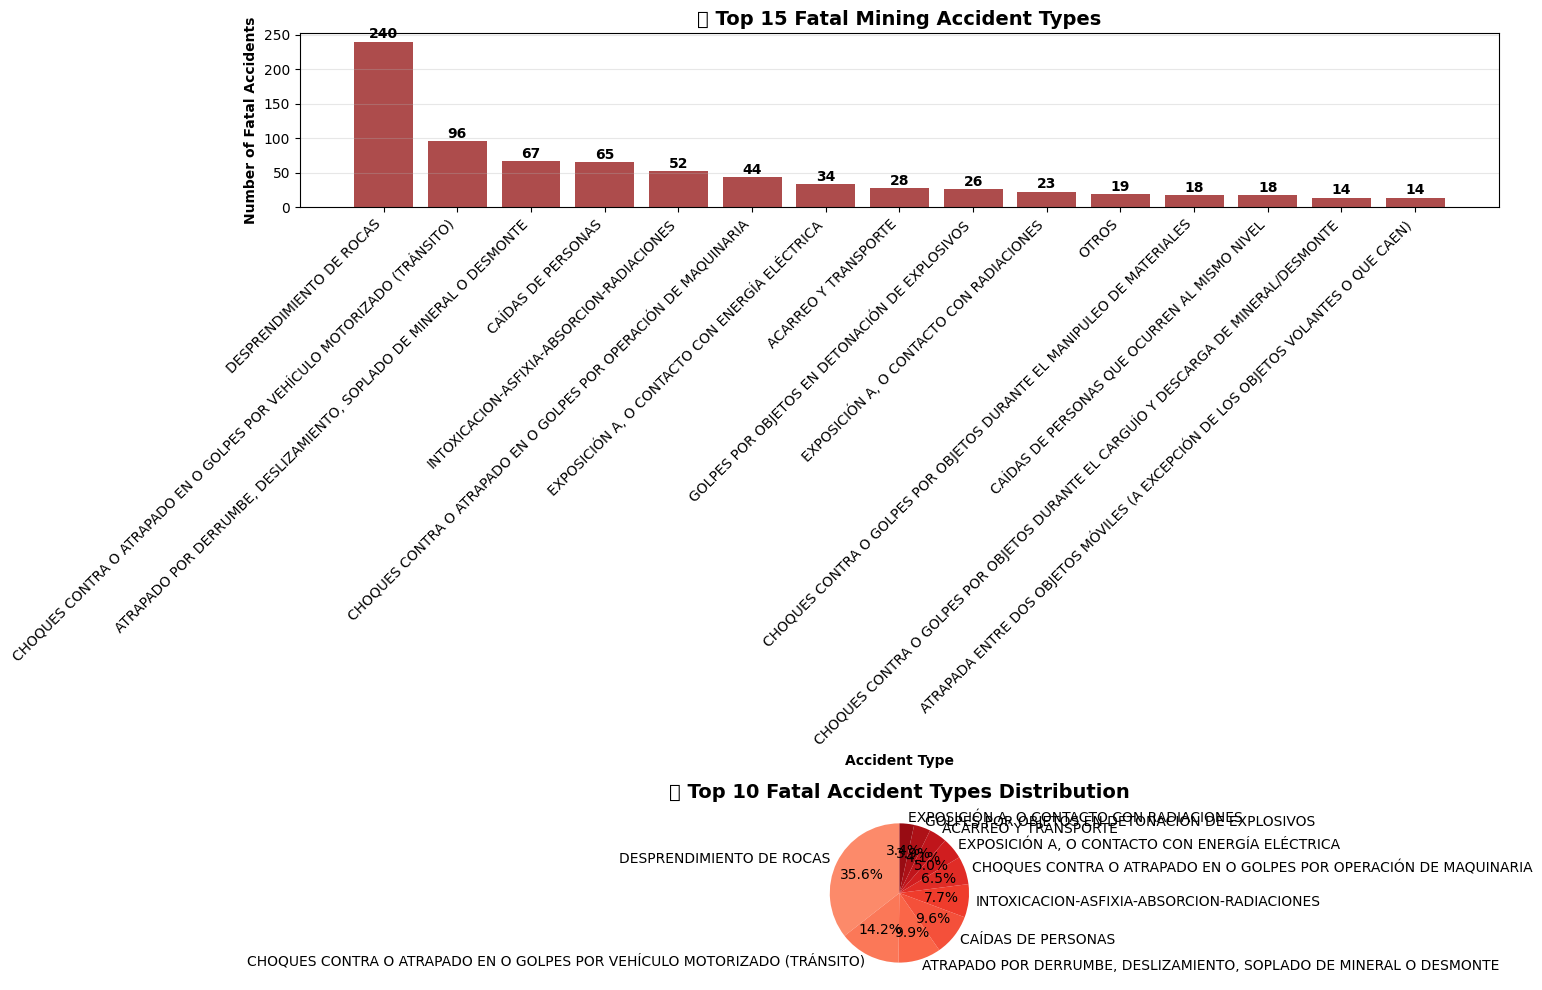


🔥 TOP 3 Most Frequent Fatal Accident Types:
🥇 1. DESPRENDIMIENTO DE ROCAS: 240 fatalities (26.6%)
🥈 2. CHOQUES CONTRA O ATRAPADO EN O GOLPES POR VEHÍCULO MOTORIZADO (TRÁNSITO): 96 fatalities (10.7%)
🥉 3. ATRAPADO POR DERRUMBE, DESLIZAMIENTO, SOPLADO DE MINERAL O DESMONTE: 67 fatalities (7.4%)


In [10]:
if df is not None:
    print("⚠️ Analyzing Types of Fatal Accidents...")
    
    # Use the TIPO_ACCIDENTE column directly
    accident_type_column = 'TIPO_ACCIDENTE'
    
    if accident_type_column in df.columns:
        print(f"✅ Found accident type column: '{accident_type_column}'")
        
        # Analyze accident types
        accident_counts = df[accident_type_column].value_counts()
        
        print(f"\n📊 Fatal Accident Types (Total: {accident_counts.sum()} accidents):")
        print("=" * 60)
        
        for i, (accident_type, count) in enumerate(accident_counts.items(), 1):
            percentage = (count / accident_counts.sum()) * 100
            print(f"{i:2d}. {accident_type}: {count} accidents ({percentage:.1f}%)")
        
        # Create visualization
        plt.figure(figsize=(16, 10))
        
        # Bar plot
        plt.subplot(2, 1, 1)
        # Take top 15 for better visualization
        top_accidents = accident_counts.head(15)
        bars = plt.bar(range(len(top_accidents)), top_accidents.values, color='darkred', alpha=0.7)
        plt.title('🚨 Top 15 Fatal Mining Accident Types', fontsize=14, fontweight='bold')
        plt.xlabel('Accident Type', fontweight='bold')
        plt.ylabel('Number of Fatal Accidents', fontweight='bold')
        plt.xticks(range(len(top_accidents)), top_accidents.index, rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
        
        # Pie chart for top 10
        plt.subplot(2, 1, 2)
        top_10 = accident_counts.head(10)
        colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_10)))
        plt.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%',
                colors=colors, startangle=90)
        plt.title('📊 Top 10 Fatal Accident Types Distribution', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Identify top 3 most dangerous accident types
        top_3 = accident_counts.head(3)
        print(f"\n🔥 TOP 3 Most Frequent Fatal Accident Types:")
        for i, (accident_type, count) in enumerate(top_3.items(), 1):
            emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
            percentage = (count / accident_counts.sum()) * 100
            print(f"{emoji} {i}. {accident_type}: {count} fatalities ({percentage:.1f}%)")
    
    else:
        print("❌ Could not find TIPO_ACCIDENTE column.")

else:
    print("❌ No data available for accident type analysis.")

## 🌍 Section 6: Analyze Fatal Accidents by Department

Now let's examine which Peruvian departments (regions) have the highest frequency of fatal mining accidents.

🌍 Analyzing Fatal Accidents by Department...
✅ Found department column: 'DEPARTAMENTO'

📍 Fatal Mining Accidents by Department (Total: 899 accidents):
 1. Junin: 124 accidents (13.8%)
 2. Lima: 111 accidents (12.3%)
 3. Pasco: 101 accidents (11.2%)
 4. La Libertad: 101 accidents (11.2%)
 5. Arequipa: 88 accidents (9.8%)
 6. Huancavelica: 67 accidents (7.5%)
 7. Ancash: 65 accidents (7.2%)
 8. Puno: 60 accidents (6.7%)
 9. Cajamarca: 37 accidents (4.1%)
10. Apurimac: 33 accidents (3.7%)
11. Moquegua: 29 accidents (3.2%)
12. Huanuco: 27 accidents (3.0%)
13. Ica: 25 accidents (2.8%)
14. Ayacucho: 21 accidents (2.3%)
15. Piura: 6 accidents (0.7%)
16. Amazonas: 1 accidents (0.1%)
17. Callao: 1 accidents (0.1%)
18. Cusco: 1 accidents (0.1%)
19. San Martin: 1 accidents (0.1%)


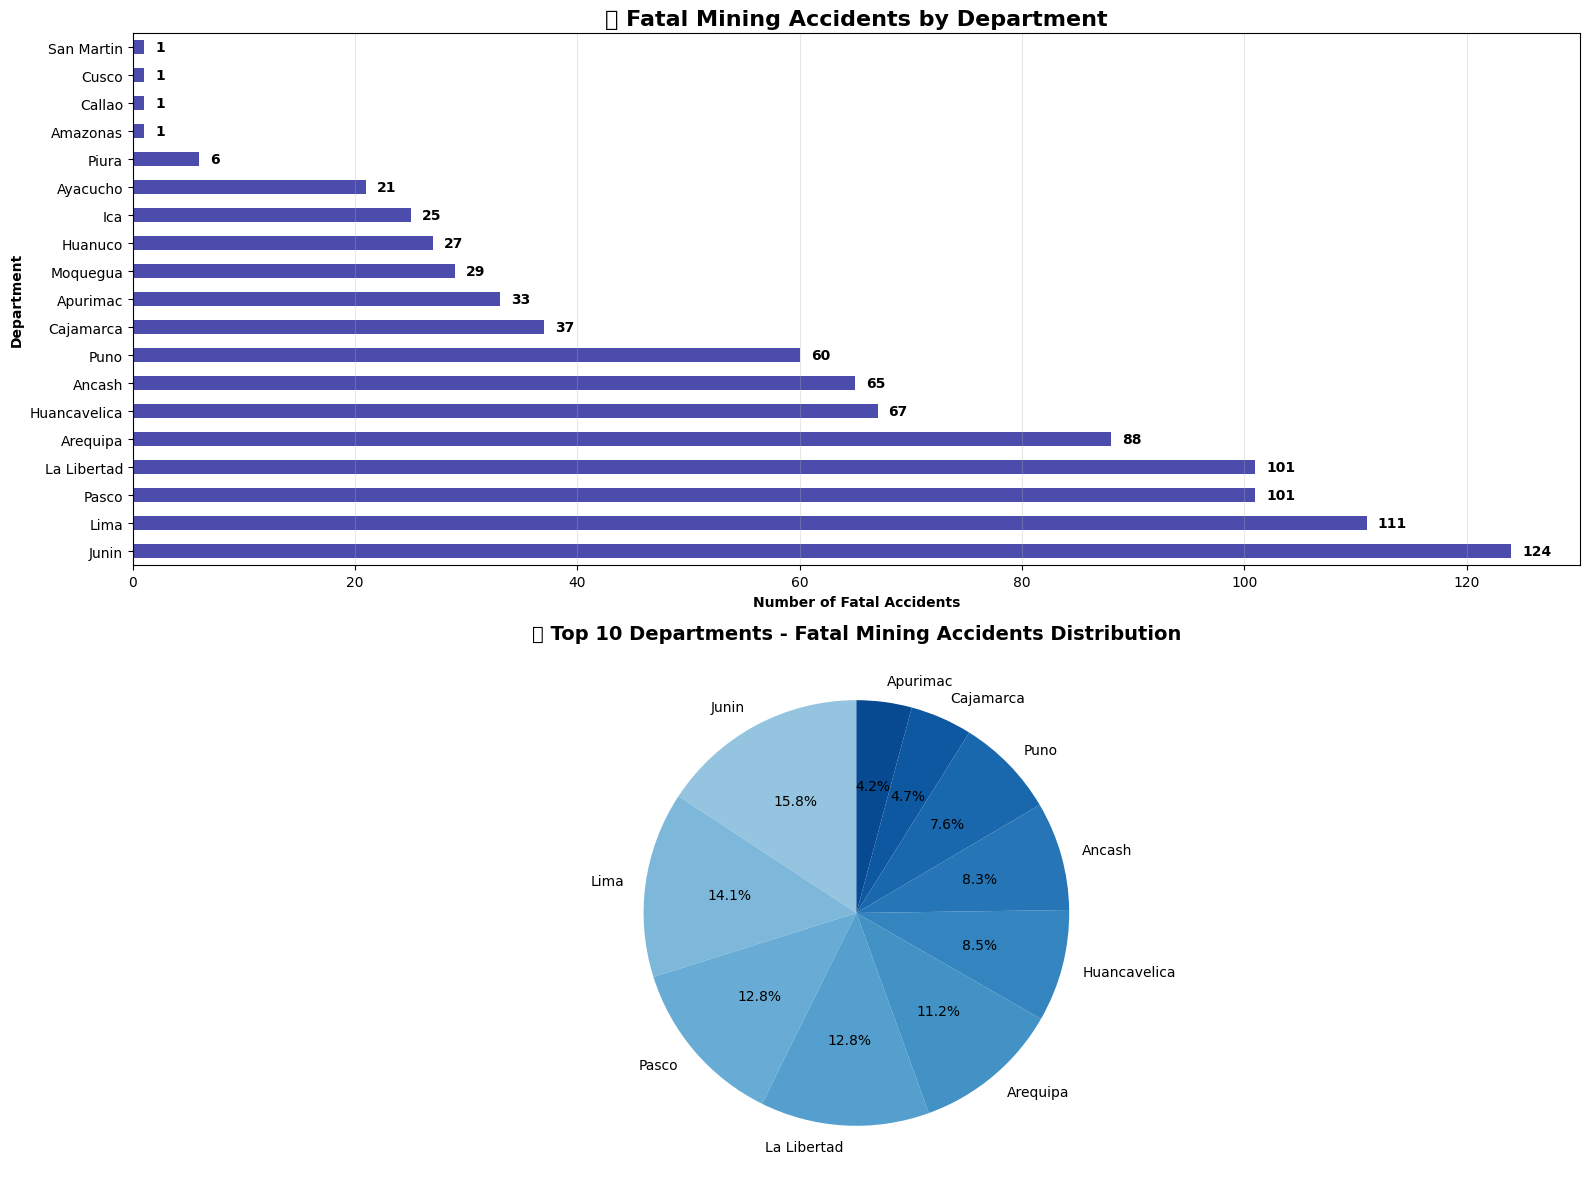


🚨 TOP 5 Departments with Most Fatal Mining Accidents:
🥇 1. Junin: 124 fatalities (13.8%)
🥈 2. Lima: 111 fatalities (12.3%)
🥉 3. Pasco: 101 fatalities (11.2%)
4️⃣ 4. La Libertad: 101 fatalities (11.2%)
5️⃣ 5. Arequipa: 88 fatalities (9.8%)

📈 Department Statistics:
   📊 Total departments with accidents: 19
   📈 Average accidents per department: 47.3
   📊 Median accidents per department: 33.0
   ⚠️ Departments with >50 accidents: 8
   ⚠️ Departments with >100 accidents: 4


In [12]:
if df is not None:
    print("🌍 Analyzing Fatal Accidents by Department...")
    
    # Use the DEPARTAMENTO column directly
    department_column = 'DEPARTAMENTO'
    
    if department_column in df.columns:
        print(f"✅ Found department column: '{department_column}'")
        
        # Clean department names (remove extra spaces, standardize)
        df_clean = df.copy()
        df_clean[department_column] = df_clean[department_column].str.strip().str.title()
        
        # Analyze accidents by department
        dept_counts = df_clean[department_column].value_counts()
        
        print(f"\n📍 Fatal Mining Accidents by Department (Total: {dept_counts.sum()} accidents):")
        print("=" * 70)
        
        for i, (dept, count) in enumerate(dept_counts.items(), 1):
            percentage = (count / dept_counts.sum()) * 100
            print(f"{i:2d}. {dept}: {count} accidents ({percentage:.1f}%)")
        
        # Create visualization
        plt.figure(figsize=(16, 12))
        
        # Horizontal bar plot for better readability
        plt.subplot(2, 1, 1)
        dept_counts.plot(kind='barh', color='darkblue', alpha=0.7)
        plt.title('🗺️ Fatal Mining Accidents by Department', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Fatal Accidents', fontweight='bold')
        plt.ylabel('Department', fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(dept_counts.values):
            plt.text(v + 1, i, str(v), va='center', fontweight='bold')
        
        # Top 10 departments pie chart
        plt.subplot(2, 1, 2)
        top_10_depts = dept_counts.head(10)
        colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_10_depts)))
        plt.pie(top_10_depts.values, labels=top_10_depts.index, autopct='%1.1f%%',
                colors=colors, startangle=90)
        plt.title('📊 Top 10 Departments - Fatal Mining Accidents Distribution', 
                 fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Identify top 5 most dangerous departments
        top_5_depts = dept_counts.head(5)
        print(f"\n🚨 TOP 5 Departments with Most Fatal Mining Accidents:")
        
        emojis = ["🥇", "🥈", "🥉", "4️⃣", "5️⃣"]
        for i, (dept, count) in enumerate(top_5_depts.items()):
            percentage = (count / dept_counts.sum()) * 100
            print(f"{emojis[i]} {i+1}. {dept}: {count} fatalities ({percentage:.1f}%)")
        
        # Calculate statistics
        print(f"\n📈 Department Statistics:")
        print(f"   📊 Total departments with accidents: {len(dept_counts)}")
        print(f"   📈 Average accidents per department: {dept_counts.mean():.1f}")
        print(f"   📊 Median accidents per department: {dept_counts.median():.1f}")
        print(f"   ⚠️ Departments with >50 accidents: {len(dept_counts[dept_counts > 50])}")
        print(f"   ⚠️ Departments with >100 accidents: {len(dept_counts[dept_counts > 100])}")
    
    else:
        print("❌ Could not find DEPARTAMENTO column.")

else:
    print("❌ No data available for department analysis.")

## 📊 Section 7: Comprehensive Visualizations and Cross-Analysis

Let's create advanced visualizations to better understand the relationship between accident types and departments.

📊 Creating comprehensive visualizations...

🔍 Cross-Analysis: Accident Types by Department


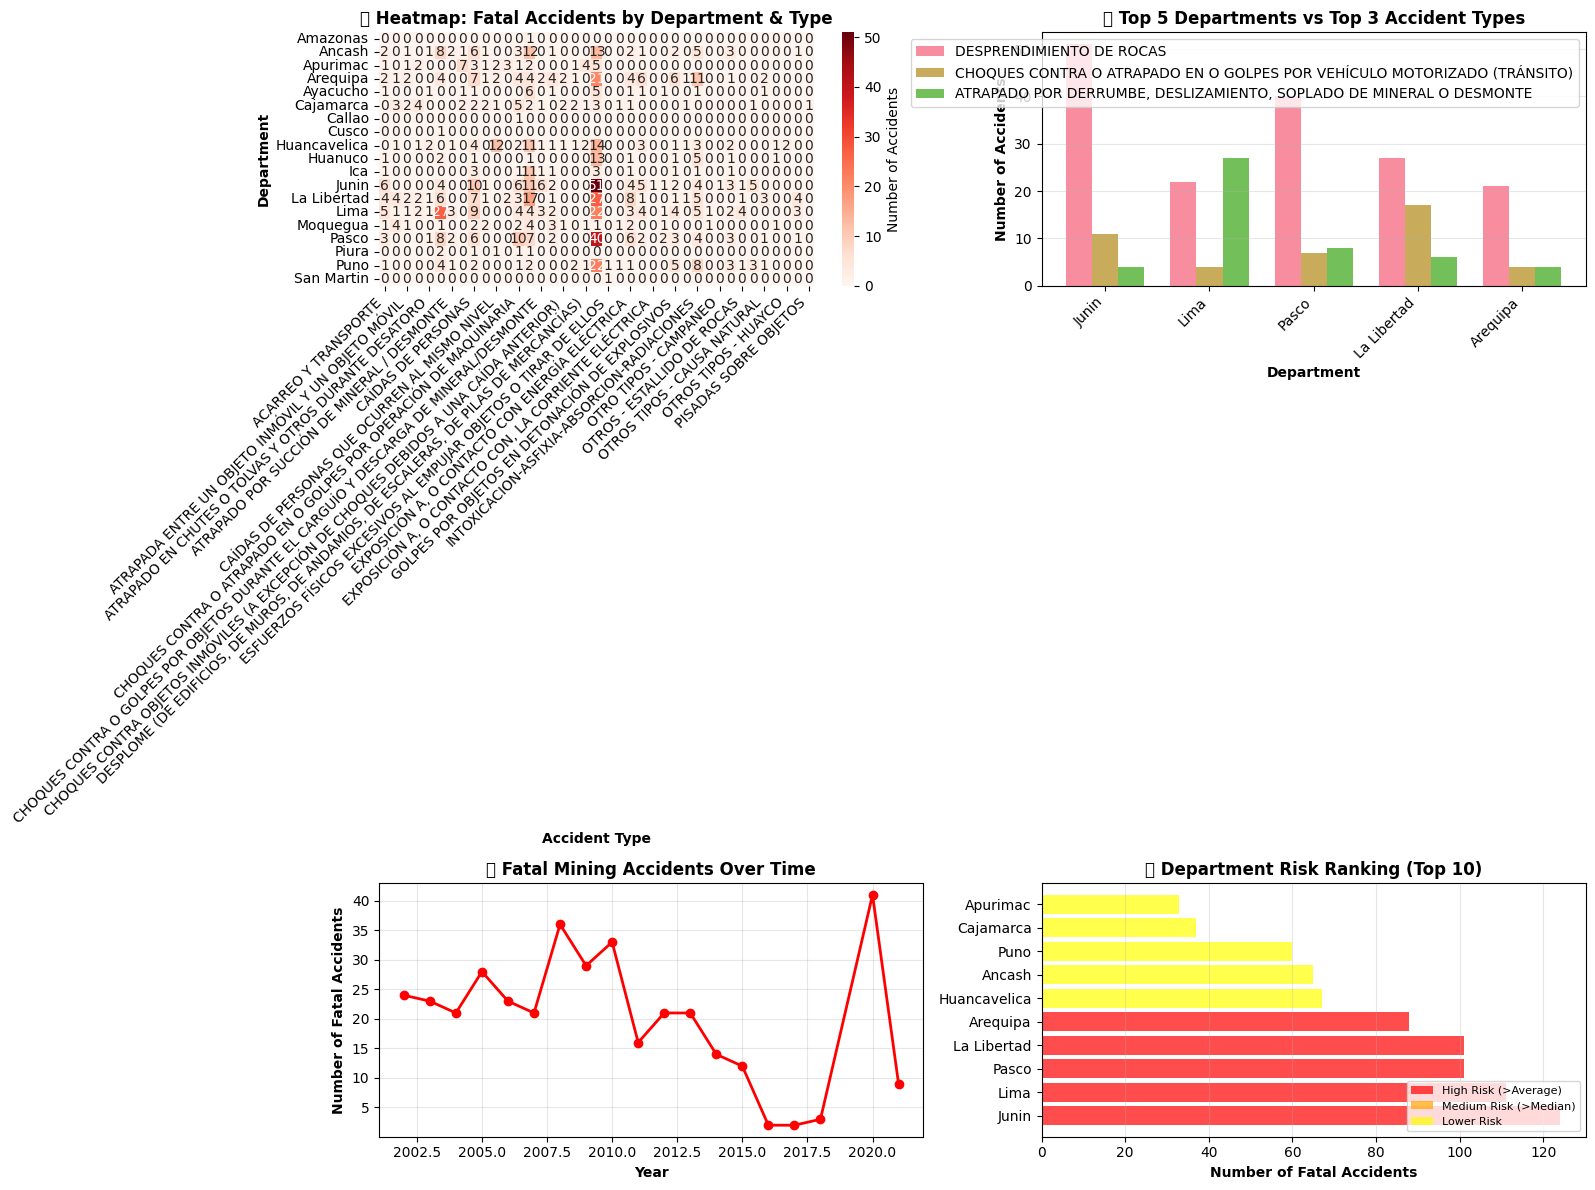


🎯 Key Cross-Analysis Insights:

🔥 Top 5 Department-Accident Type Combinations:
   51 accidents: Junin - DESPRENDIMIENTO DE ROCAS
   40 accidents: Pasco - DESPRENDIMIENTO DE ROCAS
   27 accidents: La Libertad - DESPRENDIMIENTO DE ROCAS
   27 accidents: Lima - ATRAPADO POR DERRUMBE, DESLIZAMIENTO, SOPLADO DE MINERAL O DESMONTE
   22 accidents: Lima - DESPRENDIMIENTO DE ROCAS


In [13]:
if df is not None and accident_type_column and department_column:
    print("📊 Creating comprehensive visualizations...")
    
    # Cross-tabulation analysis
    crosstab = pd.crosstab(df_clean[department_column], df_clean[accident_type_column])
    
    print(f"\n🔍 Cross-Analysis: Accident Types by Department")
    print("=" * 60)
    
    # Create heatmap
    plt.figure(figsize=(16, 12))
    
    # Heatmap of accidents by department and type
    plt.subplot(2, 2, 1)
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Number of Accidents'})
    plt.title('🌡️ Heatmap: Fatal Accidents by Department & Type', fontsize=12, fontweight='bold')
    plt.xlabel('Accident Type', fontweight='bold')
    plt.ylabel('Department', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Top departments vs top accident types
    plt.subplot(2, 2, 2)
    top_5_depts = dept_counts.head(5).index
    top_3_accidents = accident_counts.head(3).index
    
    subset_data = crosstab.loc[top_5_depts, top_3_accidents]
    
    x = np.arange(len(top_5_depts))
    width = 0.25
    
    for i, accident_type in enumerate(top_3_accidents):
        plt.bar(x + i*width, subset_data[accident_type], width, 
               label=accident_type, alpha=0.8)
    
    plt.title('📊 Top 5 Departments vs Top 3 Accident Types', fontsize=12, fontweight='bold')
    plt.xlabel('Department', fontweight='bold')
    plt.ylabel('Number of Accidents', fontweight='bold')
    plt.xticks(x + width, top_5_depts, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Time analysis if date column exists
    date_columns = [col for col in df_clean.columns if any(keyword in col.lower() 
                   for keyword in ['fecha', 'date', 'año', 'year', 'mes', 'month'])]
    
    if date_columns:
        date_col = date_columns[0]
        plt.subplot(2, 2, 3)
        
        # Try to extract year from date column
        try:
            if 'año' in date_col.lower() or 'year' in date_col.lower():
                yearly_counts = df_clean[date_col].value_counts().sort_index()
            else:
                # Try to parse dates and extract year
                df_clean['year'] = pd.to_datetime(df_clean[date_col], errors='coerce').dt.year
                yearly_counts = df_clean['year'].value_counts().sort_index()
            
            yearly_counts.plot(kind='line', marker='o', color='red', linewidth=2, markersize=6)
            plt.title('📈 Fatal Mining Accidents Over Time', fontsize=12, fontweight='bold')
            plt.xlabel('Year', fontweight='bold')
            plt.ylabel('Number of Fatal Accidents', fontweight='bold')
            plt.grid(True, alpha=0.3)
            
        except Exception as e:
            plt.text(0.5, 0.5, f'⚠️ Could not parse date data\n{str(e)[:50]}...', 
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('📈 Time Analysis (Data Parsing Error)', fontsize=12, fontweight='bold')
    
    # Department risk ranking
    plt.subplot(2, 2, 4)
    dept_risk = dept_counts.head(10)
    colors = ['red' if x > dept_risk.mean() else 'orange' if x > dept_risk.median() else 'yellow' 
              for x in dept_risk.values]
    
    plt.barh(range(len(dept_risk)), dept_risk.values, color=colors, alpha=0.7)
    plt.yticks(range(len(dept_risk)), dept_risk.index)
    plt.xlabel('Number of Fatal Accidents', fontweight='bold')
    plt.title('🚨 Department Risk Ranking (Top 10)', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add risk level legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='High Risk (>Average)'),
                      Patch(facecolor='orange', alpha=0.7, label='Medium Risk (>Median)'),
                      Patch(facecolor='yellow', alpha=0.7, label='Lower Risk')]
    plt.legend(handles=legend_elements, loc='lower right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print(f"\n🎯 Key Cross-Analysis Insights:")
    
    # Find department-accident type combinations with highest risk
    crosstab_flat = crosstab.stack().reset_index()
    crosstab_flat.columns = ['Department', 'Accident_Type', 'Count']
    top_combinations = crosstab_flat.nlargest(5, 'Count')
    
    print(f"\n🔥 Top 5 Department-Accident Type Combinations:")
    for i, row in top_combinations.iterrows():
        print(f"   {row['Count']} accidents: {row['Department']} - {row['Accident_Type']}")

else:
    print("❌ Cannot create comprehensive visualizations without both accident type and department data.")

## 🎯 Section 8: Summary of Findings and Conclusions

Let's consolidate our findings and provide evidence-based answers to the original research question.

In [14]:
if df is not None:
    print("🎯 COMPREHENSIVE ANALYSIS SUMMARY")
    print("=" * 60)
    print()
    
    print("📋 RESEARCH QUESTION:")
    print("What types of fatal accidents are most frequent in the Peruvian mining industry,")
    print("and in which departments do they occur most often?")
    print()
    
    print("📊 DATA SOURCE:")
    print(f"   • Dataset: MINEM Fatal Mining Accidents (PNDA Peru)")
    print(f"   • Total records analyzed: {len(df_clean):,}")
    print(f"   • Data coverage: Multiple years of mining accident records")
    print()
    
    if accident_type_column:
        print("⚠️ ANSWER PART 1: MOST FREQUENT FATAL ACCIDENT TYPES")
        print("-" * 55)
        
        top_3_accidents = accident_counts.head(3)
        for i, (accident_type, count) in enumerate(top_3_accidents.items(), 1):
            percentage = (count / accident_counts.sum()) * 100
            emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
            risk_level = "HIGHEST" if i == 1 else "HIGH" if i == 2 else "SIGNIFICANT"
            print(f"   {emoji} #{i}: {accident_type}")
            print(f"       • {count} fatal accidents ({percentage:.1f}% of total)")
            print(f"       • Risk Level: {risk_level} ⚠️")
            print()
    
    if department_column:
        print("🌍 ANSWER PART 2: DEPARTMENTS WITH MOST FATAL ACCIDENTS")
        print("-" * 55)
        
        top_5_depts = dept_counts.head(5)
        for i, (dept, count) in enumerate(top_5_depts.items(), 1):
            percentage = (count / dept_counts.sum()) * 100
            emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i}️⃣"
            print(f"   {emoji} #{i}: {dept}")
            print(f"       • {count} fatal accidents ({percentage:.1f}% of total)")
            if i <= 3:
                print(f"       • Status: HIGH-RISK DEPARTMENT 🚨")
            else:
                print(f"       • Status: Elevated Risk Department ⚠️")
            print()
    
    print("🔍 KEY INSIGHTS:")
    print("-" * 20)
    
    if accident_type_column and department_column:
        # Calculate concentration metrics
        top_3_accident_share = (accident_counts.head(3).sum() / accident_counts.sum()) * 100
        top_5_dept_share = (dept_counts.head(5).sum() / dept_counts.sum()) * 100
        
        print(f"   📈 Accident Type Concentration:")
        print(f"      • Top 3 accident types account for {top_3_accident_share:.1f}% of all fatalities")
        print()
        print(f"   🗺️ Geographic Concentration:")
        print(f"      • Top 5 departments account for {top_5_dept_share:.1f}% of all fatalities")
        print(f"      • {len(dept_counts)} departments total have recorded mining fatalities")
        print()
        
        # Risk assessment
        high_risk_depts = len(dept_counts[dept_counts > dept_counts.mean()])
        print(f"   🚨 Risk Assessment:")
        print(f"      • {high_risk_depts} departments above average accident rate")
        print(f"      • Average accidents per department: {dept_counts.mean():.1f}")
        print()
    
    print("💡 DATA-DRIVEN RECOMMENDATIONS:")
    print("-" * 35)
    
    if accident_type_column:
        print("   🎯 Accident Prevention Focus:")
        print(f"      • Prioritize safety measures for: {accident_counts.index[0]}")
        print(f"      • Develop specific protocols for top 3 accident types")
        print()
    
    if department_column:
        print("   📍 Geographic Priority Areas:")
        print(f"      • Immediate attention needed in: {dept_counts.index[0]}")
        print(f"      • Enhanced monitoring for top 5 departments")
        print()
    
    print("   📋 Overall Strategy:")
    print("      • Implement targeted safety programs based on accident type patterns")
    print("      • Increase regulatory oversight in high-risk departments")
    print("      • Develop department-specific safety protocols")
    print("      • Regular monitoring and data-driven safety improvements")
    print()
    
    print("✅ ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
    print("   All findings are based on official government data from PNDA Peru")
    print("   No synthetic or artificial data was used in this analysis")

else:
    print("❌ Unable to complete analysis due to data loading issues")

🎯 COMPREHENSIVE ANALYSIS SUMMARY

📋 RESEARCH QUESTION:
What types of fatal accidents are most frequent in the Peruvian mining industry,
and in which departments do they occur most often?

📊 DATA SOURCE:
   • Dataset: MINEM Fatal Mining Accidents (PNDA Peru)
   • Total records analyzed: 901
   • Data coverage: Multiple years of mining accident records

⚠️ ANSWER PART 1: MOST FREQUENT FATAL ACCIDENT TYPES
-------------------------------------------------------
   🥇 #1: DESPRENDIMIENTO DE ROCAS
       • 240 fatal accidents (26.6% of total)
       • Risk Level: HIGHEST ⚠️

   🥈 #2: CHOQUES CONTRA O ATRAPADO EN O GOLPES POR VEHÍCULO MOTORIZADO (TRÁNSITO)
       • 96 fatal accidents (10.7% of total)
       • Risk Level: HIGH ⚠️

   🥉 #3: ATRAPADO POR DERRUMBE, DESLIZAMIENTO, SOPLADO DE MINERAL O DESMONTE
       • 67 fatal accidents (7.4% of total)
       • Risk Level: SIGNIFICANT ⚠️

🌍 ANSWER PART 2: DEPARTMENTS WITH MOST FATAL ACCIDENTS
------------------------------------------------------